# Using the `AxInfo` to embed physical information

@Author: Francesco Picetti - picettifrancesco@gmail.com

In this notebook, we show how to use the [`AxInfo`](https://github.com/fpicetti/occamypy/blob/master/occamypy/vector/axis_info.py) class to embed useful information about vectors' axes.

Inherited by SEPLib vectors, basically we want to associate to a vector a list containing a `NamedTuple` for each vector dimension.

This NamedTuple has the following attributes:
* `n`: number of samples of that axis
* `o`: origin value of the axis (i.e., the value of the first sample) [dafu
* `d`: sampling step of the axis (.e.,
* `l`: label to describe the axis [default: `undefined`]



In [1]:
import numpy as np
import occamypy as o
import matplotlib.pyplot as plt

WARNING! DATAPATH not found. The folder /tmp will be used to write binary files


/nas/home/fpicetti/miniconda3/envs/occd/lib/python3.10/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


## 1D case

Let's start with a simple 1D vector: a Ricker wavelet

In [2]:
ot = 0.
dt = 0.002  # fs = 500Hz
wav = o.VectorNumpy(np.load("./data/ricker20.npy"))

Every Vector object has a `ax_info` attribute that is a list

In [3]:
wav.ax_info

[]

We can fill it with the `Vector.init_ax_info()` method, using the default values

In [4]:
wav.init_ax_info()

In [5]:
wav.ax_info

[AxInfo(n=51, o=0.0, d=1.0, l='undefined')]

Since we know that this axis is a time axis, we can incorporate such information

In [6]:
wav.ax_info = [o.AxInfo(wav.size, ot, dt, "time [s]")]

In [7]:
wav.ax_info

[AxInfo(n=51, o=0.0, d=0.002, l='time [s]')]

Now we can access such information in a easier way! Now let's plot this wavelet given that

* the x axis limiters are retrieved by `AxInfo.o` (origin) and `AxInfo.last` attributes
* the `xlabel` is set with the `AxInfo.l` attribute
* `AxInfo` has a method `plot()` that return a plottable array of axis value

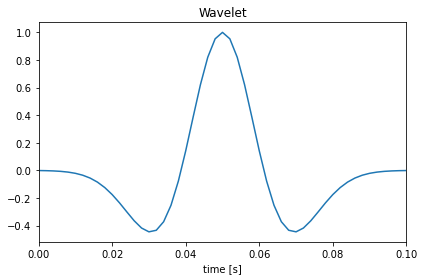

In [8]:
plt.figure()
plt.plot(wav.ax_info[0].plot(), wav.plot())
plt.xlim(wav.ax_info[0].o, wav.ax_info[0].last)
plt.xlabel(wav.ax_info[0].l)
plt.title("Wavelet")
plt.tight_layout()
plt.show()

## 2D case

Now let's move to a 2D example: a two-layer velocity model sampled at 10m, with a Gaussian anomaly

In [9]:
vp = o.VectorNumpy((101, 101)).zero()
vp.ax_info = [o.AxInfo(101, 0., 10., "z [m]"),
              o.AxInfo(101, 0., 10., "x [m]")]

In [10]:
vp[35, 50] = 1.

G = o.GaussianFilter(vp, (3, 10))
vp = G * vp

vp.scale(1e5)

vp.addbias(1500.)

vp[50:] = 3500.

Again, we use the `plot()` method of the Vector to get a plottable image.

Note that the `extent` parameter for `plt.imshow` can rely on the `ax_info` list!

In [11]:
extent = [vp.ax_info[1].o,     # left
          vp.ax_info[1].last,  # right
          vp.ax_info[0].last,  # bottom 
          vp.ax_info[0].o]     # top

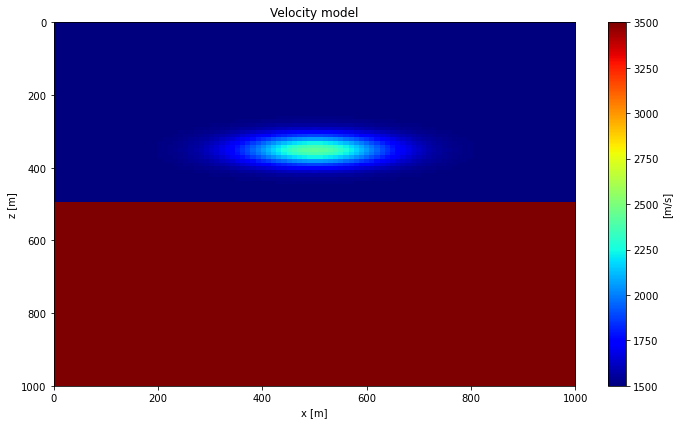

In [12]:
plt.figure(figsize=(10,6))
plt.imshow(vp.plot(), cmap="jet", aspect="auto", extent=extent)

plt.colorbar(label="[m/s]")

plt.xlabel(vp.ax_info[1].l)
plt.ylabel(vp.ax_info[0].l)

plt.title("Velocity model")
plt.tight_layout()
plt.show()